## Project Description

The dataset describes the chemical properties of glass and involves classifying samples of glass using their chemical properties as one of six classes. The dataset was credited to Vina Spiehler in 1987. The study of classification of types of glass was motivated by criminological investigation. At the scene of the crime, the glass left can be used as evidence...if it is correctly identified!

The chemical compositions are measured as the weight percent in corresponding oxide.
Attribute Information-
1.	 Id number: 1 to 214
2.	 RI: refractive index
3.	Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
4.	Mg: Magnesium
5.	Al: Aluminum
6.	Si: Silicon
7.	K: Potassium
8.	Ca: Calcium
9.	Ba: Barium
10.	Fe: Iron
11.	Type of glass: (class attribute)
•	1- building_windows_float_processed
•	2- building_windows_non_float_processed
•	3- vehicle_windows_float_processed
•	4- vehicle_windows_non_float_processed (none in this database)
•	5- containers
•	6- tableware
•	7- headlamps
There are 214 observations in the dataset. The dataset can be divided into window glass (classes 1-4) and non-window glass (classes 5-7). 
Predict : Type of glass


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import scipy
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE


In [4]:
!pip install imbalanced-learn

In [5]:
conda install -c conda-forge imbalanced-learn

Solving environment: ...working... done

# All requested packages already installed.

Retrieving notices: ...working... done

Note: you may need to restart the kernel to use updated packages.




==> WARNING: A newer version of conda exists. <==
  current version: 22.9.0
  latest version: 23.5.2

Please update conda by running

    $ conda update -n base -c defaults conda




In [9]:
conda update -n base -c defaults conda


Solving environment: ...working... done

# All requested packages already installed.

Retrieving notices: ...working... done

Note: you may need to restart the kernel to use updated packages.




==> WARNING: A newer version of conda exists. <==
  current version: 22.9.0
  latest version: 23.5.0

Please update conda by running

    $ conda update -n base -c defaults conda




In [8]:
#importing dataset

df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/glass.csv', sep=',')
df

,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00.1,1.1
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
...,...,...,...,...,...,...,...,...,...,...,...
208,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7
209,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00,7
210,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00,7
211,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.00,7


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   1        213 non-null    int64  
 1   1.52101  213 non-null    float64
 2   13.64    213 non-null    float64
 3   4.49     213 non-null    float64
 4   1.10     213 non-null    float64
 5   71.78    213 non-null    float64
 6   0.06     213 non-null    float64
 7   8.75     213 non-null    float64
 8   0.00     213 non-null    float64
 9   0.00.1   213 non-null    float64
 10  1.1      213 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.4 KB


Id number: 1 to 214
RI: refractive index
Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
Mg: Magnesium
Al: Aluminum
Si: Silicon
K: Potassium
Ca: Calcium
Ba: Barium
Fe: Iron
Type of glass: (class attribute)


In [10]:
df_copy=df.copy()

df_copy=df_copy.rename(columns={'1':'Id number','1.52101':'RI: refracitve_index','13.64':'Na: Sodium','4.49':'Mg: Magnesium','1.10':'Al: Aluminum','71.78':'Si: Silicon','0.06':'K: Potassium','8.75':'Ca: Calcium','0.00':'Ba:Barium','0.00.1':'Fe: Iron','1.1':'Type of glass'})
                       
df_copy                     

,Id number,RI: refracitve_index,Na: Sodium,Mg: Magnesium,Al: Aluminum,Si: Silicon,K: Potassium,Ca: Calcium,Ba:Barium,Fe: Iron,Type of glass
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
...,...,...,...,...,...,...,...,...,...,...,...
208,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7
209,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00,7
210,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00,7
211,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.00,7


In [11]:
# adding new row to the dataframe

new_row = {'Id number': 1, 'RI: refracitve_index': 1.52101,'Na: Sodium':13.64,'Mg: Magnesium': 4.49,
           'Al: Aluminum': 1.10,'Si:Silicon': 71.78,'K: Potassium': 0.06,'Ca: Calcium': 8.75,
           'Ba:Barium': 0.00,'Fe: Iron': 0.001,'Type of glass': 1.1}

df_copy.loc[-1] = new_row
df_copy.index = df_copy.index + 1
df1 = df_copy.sort_index()
df1


,Id number,RI: refracitve_index,Na: Sodium,Mg: Magnesium,Al: Aluminum,Si: Silicon,K: Potassium,Ca: Calcium,Ba:Barium,Fe: Iron,Type of glass
0,1,1.52101,13.64,4.49,1.10,NaN,0.06,8.75,0.00,0.001,1.1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.000,1.0
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.000,1.0
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.000,1.0
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.000,1.0
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.000,7.0
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.000,7.0
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.000,7.0
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.000,7.0


# Exploratory Data Analysis

In [12]:
#Filling null values in quality with its mean

df1['Si: Silicon'] = df1['Si: Silicon'].fillna(71.78)

In [121]:
df1

,Id number,RI: refracitve_index,Na: Sodium,Mg: Magnesium,Al: Aluminum,Si: Silicon,K: Potassium,Ca: Calcium,Ba:Barium,Fe: Iron,Type of glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.001,1.1
1,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.001,1.1
2,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.000,1.0
3,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.000,1.0
4,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.000,1.0
...,...,...,...,...,...,...,...,...,...,...,...
210,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.000,7.0
211,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.000,7.0
212,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.000,7.0
213,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.000,7.0


In [13]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Id number             214 non-null    int64  
 1   RI: refracitve_index  214 non-null    float64
 2   Na: Sodium            214 non-null    float64
 3   Mg: Magnesium         214 non-null    float64
 4   Al: Aluminum          214 non-null    float64
 5   Si: Silicon           214 non-null    float64
 6   K: Potassium          214 non-null    float64
 7   Ca: Calcium           214 non-null    float64
 8   Ba:Barium             214 non-null    float64
 9   Fe: Iron              214 non-null    float64
 10  Type of glass         214 non-null    float64
dtypes: float64(10), int64(1)
memory usage: 20.1 KB


In [14]:
df1['Si: Silicon'] = df1['Si: Silicon'].astype('float64').round(2)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Id number             214 non-null    int64  
 1   RI: refracitve_index  214 non-null    float64
 2   Na: Sodium            214 non-null    float64
 3   Mg: Magnesium         214 non-null    float64
 4   Al: Aluminum          214 non-null    float64
 5   Si: Silicon           214 non-null    float64
 6   K: Potassium          214 non-null    float64
 7   Ca: Calcium           214 non-null    float64
 8   Ba:Barium             214 non-null    float64
 9   Fe: Iron              214 non-null    float64
 10  Type of glass         214 non-null    float64
dtypes: float64(10), int64(1)
memory usage: 20.1 KB


In [15]:
df1.isnull().sum()

Id number               0
RI: refracitve_index    0
Na: Sodium              0
Mg: Magnesium           0
Al: Aluminum            0
Si: Silicon             0
K: Potassium            0
Ca: Calcium             0
Ba:Barium               0
Fe: Iron                0
Type of glass           0
dtype: int64

In [16]:
#checking the dimension of the dataset

df1.shape

(214, 11)

In [17]:
df1.columns

Index(['Id number', 'RI: refracitve_index', 'Na: Sodium', 'Mg: Magnesium',
       'Al: Aluminum', 'Si: Silicon', 'K: Potassium', 'Ca: Calcium',
       'Ba:Barium', 'Fe: Iron', 'Type of glass'],
      dtype='object')

In [18]:
df1.columns.tolist()

['Id number',
 'RI: refracitve_index',
 'Na: Sodium',
 'Mg: Magnesium',
 'Al: Aluminum',
 'Si: Silicon',
 'K: Potassium',
 'Ca: Calcium',
 'Ba:Barium',
 'Fe: Iron',
 'Type of glass']

In [19]:
df1.tail()

,Id number,RI: refracitve_index,Na: Sodium,Mg: Magnesium,Al: Aluminum,Si: Silicon,K: Potassium,Ca: Calcium,Ba:Barium,Fe: Iron,Type of glass
209,210,1.51623,14.14,0.0,2.88,72.61,0.08,9.18,1.06,0.0,7.0
210,211,1.51685,14.92,0.0,1.99,73.06,0.00,8.40,1.59,0.0,7.0
211,212,1.52065,14.36,0.0,2.02,73.42,0.00,8.44,1.64,0.0,7.0
212,213,1.51651,14.38,0.0,1.94,73.61,0.00,8.48,1.57,0.0,7.0
213,214,1.51711,14.23,0.0,2.08,73.36,0.00,8.62,1.67,0.0,7.0


<AxesSubplot:>

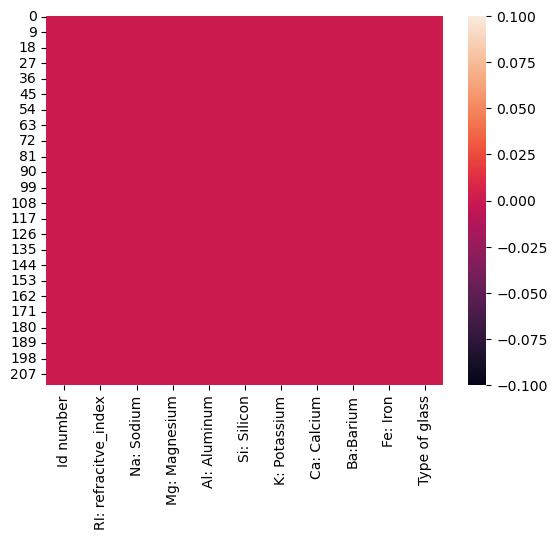

In [20]:
#lets visualize it using heatmap
sns.heatmap(df1.isnull())

This gives the brief about the dataset which includes indexing type, indexing type, column type, no null values and memory usage. 

In [21]:
df1['Type of glass'].unique()

array([1.1, 1. , 2. , 3. , 5. , 6. , 7. ])

In [22]:
df1['Type of glass'] = df1['Type of glass'].astype('int64')


In [23]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Id number             214 non-null    int64  
 1   RI: refracitve_index  214 non-null    float64
 2   Na: Sodium            214 non-null    float64
 3   Mg: Magnesium         214 non-null    float64
 4   Al: Aluminum          214 non-null    float64
 5   Si: Silicon           214 non-null    float64
 6   K: Potassium          214 non-null    float64
 7   Ca: Calcium           214 non-null    float64
 8   Ba:Barium             214 non-null    float64
 9   Fe: Iron              214 non-null    float64
 10  Type of glass         214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 20.1 KB


In [24]:
df1['Type of glass'].nunique()

6

In [25]:
#checking the value counts of each column

for i in df1.columns:
    print(df1[i].value_counts())
    print("\n")

1      1
135    1
137    1
138    1
139    1
      ..
75     1
76     1
77     1
78     1
214    1
Name: Id number, Length: 214, dtype: int64


1.52152    3
1.51590    3
1.51645    3
1.51754    2
1.51841    2
          ..
1.51625    1
1.51569    1
1.51605    1
1.51588    1
1.51651    1
Name: RI: refracitve_index, Length: 178, dtype: int64


13.02    5
13.21    5
13.00    5
13.64    4
13.33    4
        ..
13.34    1
13.31    1
14.17    1
13.51    1
14.23    1
Name: Na: Sodium, Length: 142, dtype: int64


0.00    42
3.48     8
3.58     8
3.54     8
3.52     7
        ..
2.76     1
3.15     1
2.90     1
3.83     1
1.78     1
Name: Mg: Magnesium, Length: 94, dtype: int64


1.54    8
1.19    6
1.43    5
1.29    5
1.23    5
       ..
1.08    1
1.64    1
1.61    1
1.07    1
1.94    1
Name: Al: Aluminum, Length: 118, dtype: int64


72.86    4
72.99    4
73.10    4
73.28    4
73.11    4
        ..
73.55    1
72.34    1
72.26    1
73.26    1
73.61    1
Name: Si: Silicon, Length: 133, dtype: int

These are the value counts of all columns, let's check the unique value of column.

# Type of glass: (class attribute) 

• 1- building_windows_float_processed 
• 2- building_windows_non_float_processed 
• 3- vehicle_windows_float_processed 
• 4- vehicle_windows_non_float_processed (none in this database) 
• 5- containers 
• 6- tableware 
• 7- headlamps There are 214 observations in the dataset. 

The dataset can be divided into window glass (classes 1-4) and non-window glass (classes 5-7). 


Predict : Type of glass

In [26]:
grouped_data= df1.groupby('Type of glass')
print(grouped_data.mean())

               Id number  RI: refracitve_index  Na: Sodium  Mg: Magnesium  \
Type of glass                                                               
1                   35.5              1.518718   13.242286       3.552429   
2                  108.5              1.518619   13.111711       3.002105   
3                  155.0              1.517964   13.437059       3.543529   
5                  170.0              1.518928   12.827692       0.773846   
6                  181.0              1.517456   14.646667       1.305556   
7                  200.0              1.517116   14.442069       0.538276   

               Al: Aluminum  Si: Silicon  K: Potassium  Ca: Calcium  \
Type of glass                                                         
1                  1.163857    72.619143      0.447429     8.797286   
2                  1.408158    72.598026      0.521053     9.073684   
3                  1.201176    72.404706      0.406471     8.782941   
5                  2.033846 

In [27]:
window_glass = []

for index, row in df1.iterrows():
    if row['Type of glass'] in range(1, 4):
        window_glass.append('Window glass')
        print("Window glass")
    else:
        if row['Type of glass'] in range(5, 10):
            window_glass.append('Non-window glass')
            print("Non-Window glass")

df1['Window glass'] = window_glass

Window glass
Window glass
Window glass
Window glass
Window glass
Window glass
Window glass
Window glass
Window glass
Window glass
Window glass
Window glass
Window glass
Window glass
Window glass
Window glass
Window glass
Window glass
Window glass
Window glass
Window glass
Window glass
Window glass
Window glass
Window glass
Window glass
Window glass
Window glass
Window glass
Window glass
Window glass
Window glass
Window glass
Window glass
Window glass
Window glass
Window glass
Window glass
Window glass
Window glass
Window glass
Window glass
Window glass
Window glass
Window glass
Window glass
Window glass
Window glass
Window glass
Window glass
Window glass
Window glass
Window glass
Window glass
Window glass
Window glass
Window glass
Window glass
Window glass
Window glass
Window glass
Window glass
Window glass
Window glass
Window glass
Window glass
Window glass
Window glass
Window glass
Window glass
Window glass
Window glass
Window glass
Window glass
Window glass
Window glass
Window glass

In [28]:
df1

,Id number,RI: refracitve_index,Na: Sodium,Mg: Magnesium,Al: Aluminum,Si: Silicon,K: Potassium,Ca: Calcium,Ba:Barium,Fe: Iron,Type of glass,Window glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.001,1,Window glass
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.000,1,Window glass
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.000,1,Window glass
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.000,1,Window glass
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.000,1,Window glass
...,...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.000,7,Non-window glass
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.000,7,Non-window glass
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.000,7,Non-window glass
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.000,7,Non-window glass


In [62]:
#Seperating Numerical and Categorical columns

#checking for categorical columns

categorical_col = []
for i in df1.dtypes.index:
    if df1.dtypes[i]!="float":
        categorical_col.append(i)
print("categorical Columns:",categorical_col)

#checking for numerical columns

numerical_col = []
for i in df1.dtypes.index:
    if df1.dtypes[i]=="float":
        numerical_col.append(i)
print("Numerical Columns:",numerical_col)


categorical Columns: ['Id number', 'Type of glass', 'Window glass']
Numerical Columns: ['RI: refracitve_index', 'Na: Sodium', 'Mg: Magnesium', 'Al: Aluminum', 'Si: Silicon', 'K: Potassium', 'Ca: Calcium', 'Ba:Barium', 'Fe: Iron']


In [61]:
df1.describe().round(2)

,Id number,RI: refracitve_index,Na: Sodium,Mg: Magnesium,Al: Aluminum,Si: Silicon,K: Potassium,Ca: Calcium,Ba:Barium,Fe: Iron,Type of glass
count,214.00,214.00,214.00,214.00,214.00,214.00,214.00,214.00,214.00,214.00,214.00
mean,107.50,1.52,13.41,2.68,1.44,72.65,0.50,8.96,0.18,0.06,2.78
std,61.92,0.00,0.82,1.44,0.50,0.77,0.65,1.42,0.50,0.10,2.10
min,1.00,1.51,10.73,0.00,0.29,69.81,0.00,5.43,0.00,0.00,1.00
25%,54.25,1.52,12.91,2.11,1.19,72.28,0.12,8.24,0.00,0.00,1.00
50%,107.50,1.52,13.30,3.48,1.36,72.79,0.56,8.60,0.00,0.00,2.00
75%,160.75,1.52,13.82,3.60,1.63,73.09,0.61,9.17,0.00,0.10,3.00
max,214.00,1.53,17.38,4.49,3.50,75.41,6.21,16.19,3.15,0.51,7.00


This gives the statistical information of the numerical columns.

From the above description we can observe the following:

The counts of all the columns are same which means there are no missing values in the data set.

The mean value is higher than the median(50%) Type of glass column which means the data is skewed to right in this column.

By summarizing the data we can observe there is a huge differences between 75% and max hence there are outliers present in the data

We can also notice the Standard deviation, min 25% values from the described method.

In [63]:
df1.head()

,Id number,RI: refracitve_index,Na: Sodium,Mg: Magnesium,Al: Aluminum,Si: Silicon,K: Potassium,Ca: Calcium,Ba:Barium,Fe: Iron,Type of glass,Window glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.001,1,Window glass
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.000,1,Window glass
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.000,1,Window glass
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.000,1,Window glass
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.000,1,Window glass


# Data Visualization 


Univariate Analysis

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type of glass, dtype: int64


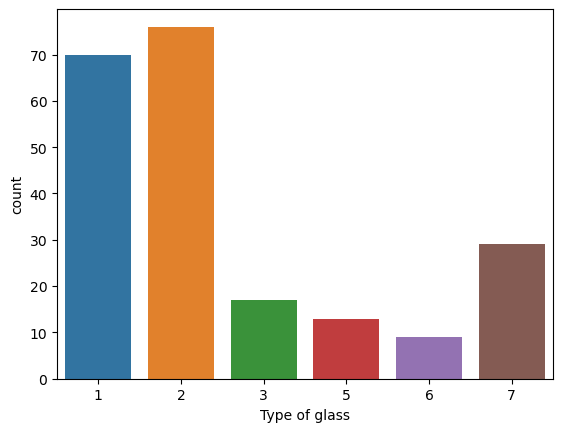

In [64]:
#visualize the number of types of glass column

ax=sns.countplot(x= 'Type of glass',data=df1)
print(df1['Type of glass'].value_counts())


Window glass        163
Non-window glass     51
Name: Window glass, dtype: int64


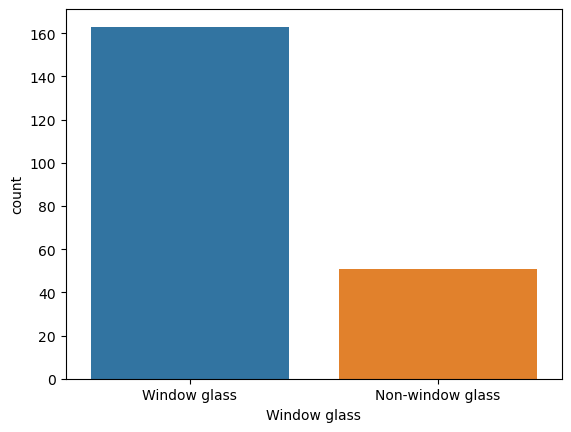

In [65]:
#visualize the number of types of glass window and non-window column

ax=sns.countplot(x= 'Window glass',data=df1)
print(df1['Window glass'].value_counts())


In [66]:
df1.corr()

,Id number,RI: refracitve_index,Na: Sodium,Mg: Magnesium,Al: Aluminum,Si: Silicon,K: Potassium,Ca: Calcium,Ba:Barium,Fe: Iron,Type of glass
Id number,1.000000,-0.072209,0.375722,-0.650328,0.490113,0.061232,0.003149,0.090800,0.451001,-0.072879,0.877357
RI: refracitve_index,-0.072209,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143056,-0.164237
Na: Sodium,0.375722,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241339,0.502898
Mg: Magnesium,-0.650328,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083122,-0.744993
Al: Aluminum,0.490113,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074438,0.598829
Si: Silicon,0.061232,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094258,0.151565
K: Potassium,0.003149,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007752,-0.010054
Ca: Calcium,0.090800,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124965,0.000952
Ba:Barium,0.451001,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058710,0.575161
Fe: Iron,-0.072879,0.143056,-0.241339,0.083122,-0.074438,-0.094258,-0.007752,0.124965,-0.058710,1.000000,-0.188324


In [67]:
df1.corr().round(2)

,Id number,RI: refracitve_index,Na: Sodium,Mg: Magnesium,Al: Aluminum,Si: Silicon,K: Potassium,Ca: Calcium,Ba:Barium,Fe: Iron,Type of glass
Id number,1.00,-0.07,0.38,-0.65,0.49,0.06,0.00,0.09,0.45,-0.07,0.88
RI: refracitve_index,-0.07,1.00,-0.19,-0.12,-0.41,-0.54,-0.29,0.81,-0.00,0.14,-0.16
Na: Sodium,0.38,-0.19,1.00,-0.27,0.16,-0.07,-0.27,-0.28,0.33,-0.24,0.50
Mg: Magnesium,-0.65,-0.12,-0.27,1.00,-0.48,-0.17,0.01,-0.44,-0.49,0.08,-0.74
Al: Aluminum,0.49,-0.41,0.16,-0.48,1.00,-0.01,0.33,-0.26,0.48,-0.07,0.60
Si: Silicon,0.06,-0.54,-0.07,-0.17,-0.01,1.00,-0.19,-0.21,-0.10,-0.09,0.15
K: Potassium,0.00,-0.29,-0.27,0.01,0.33,-0.19,1.00,-0.32,-0.04,-0.01,-0.01
Ca: Calcium,0.09,0.81,-0.28,-0.44,-0.26,-0.21,-0.32,1.00,-0.11,0.12,0.00
Ba:Barium,0.45,-0.00,0.33,-0.49,0.48,-0.10,-0.04,-0.11,1.00,-0.06,0.58
Fe: Iron,-0.07,0.14,-0.24,0.08,-0.07,-0.09,-0.01,0.12,-0.06,1.00,-0.19


# Bivariate Analysis


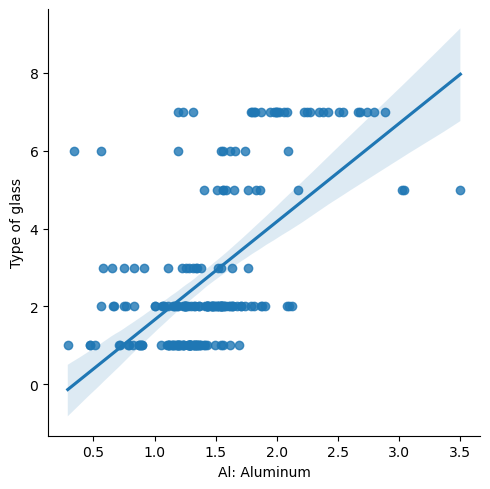

In [36]:
#After observing the correlation graph, we plot two variable graph to check the relation since Aluminum shows the strongest correlation with Types of glass, we will check it first. 

sns.lmplot(x='Al: Aluminum',y='Type of glass',data=df1,palette='colorblind')

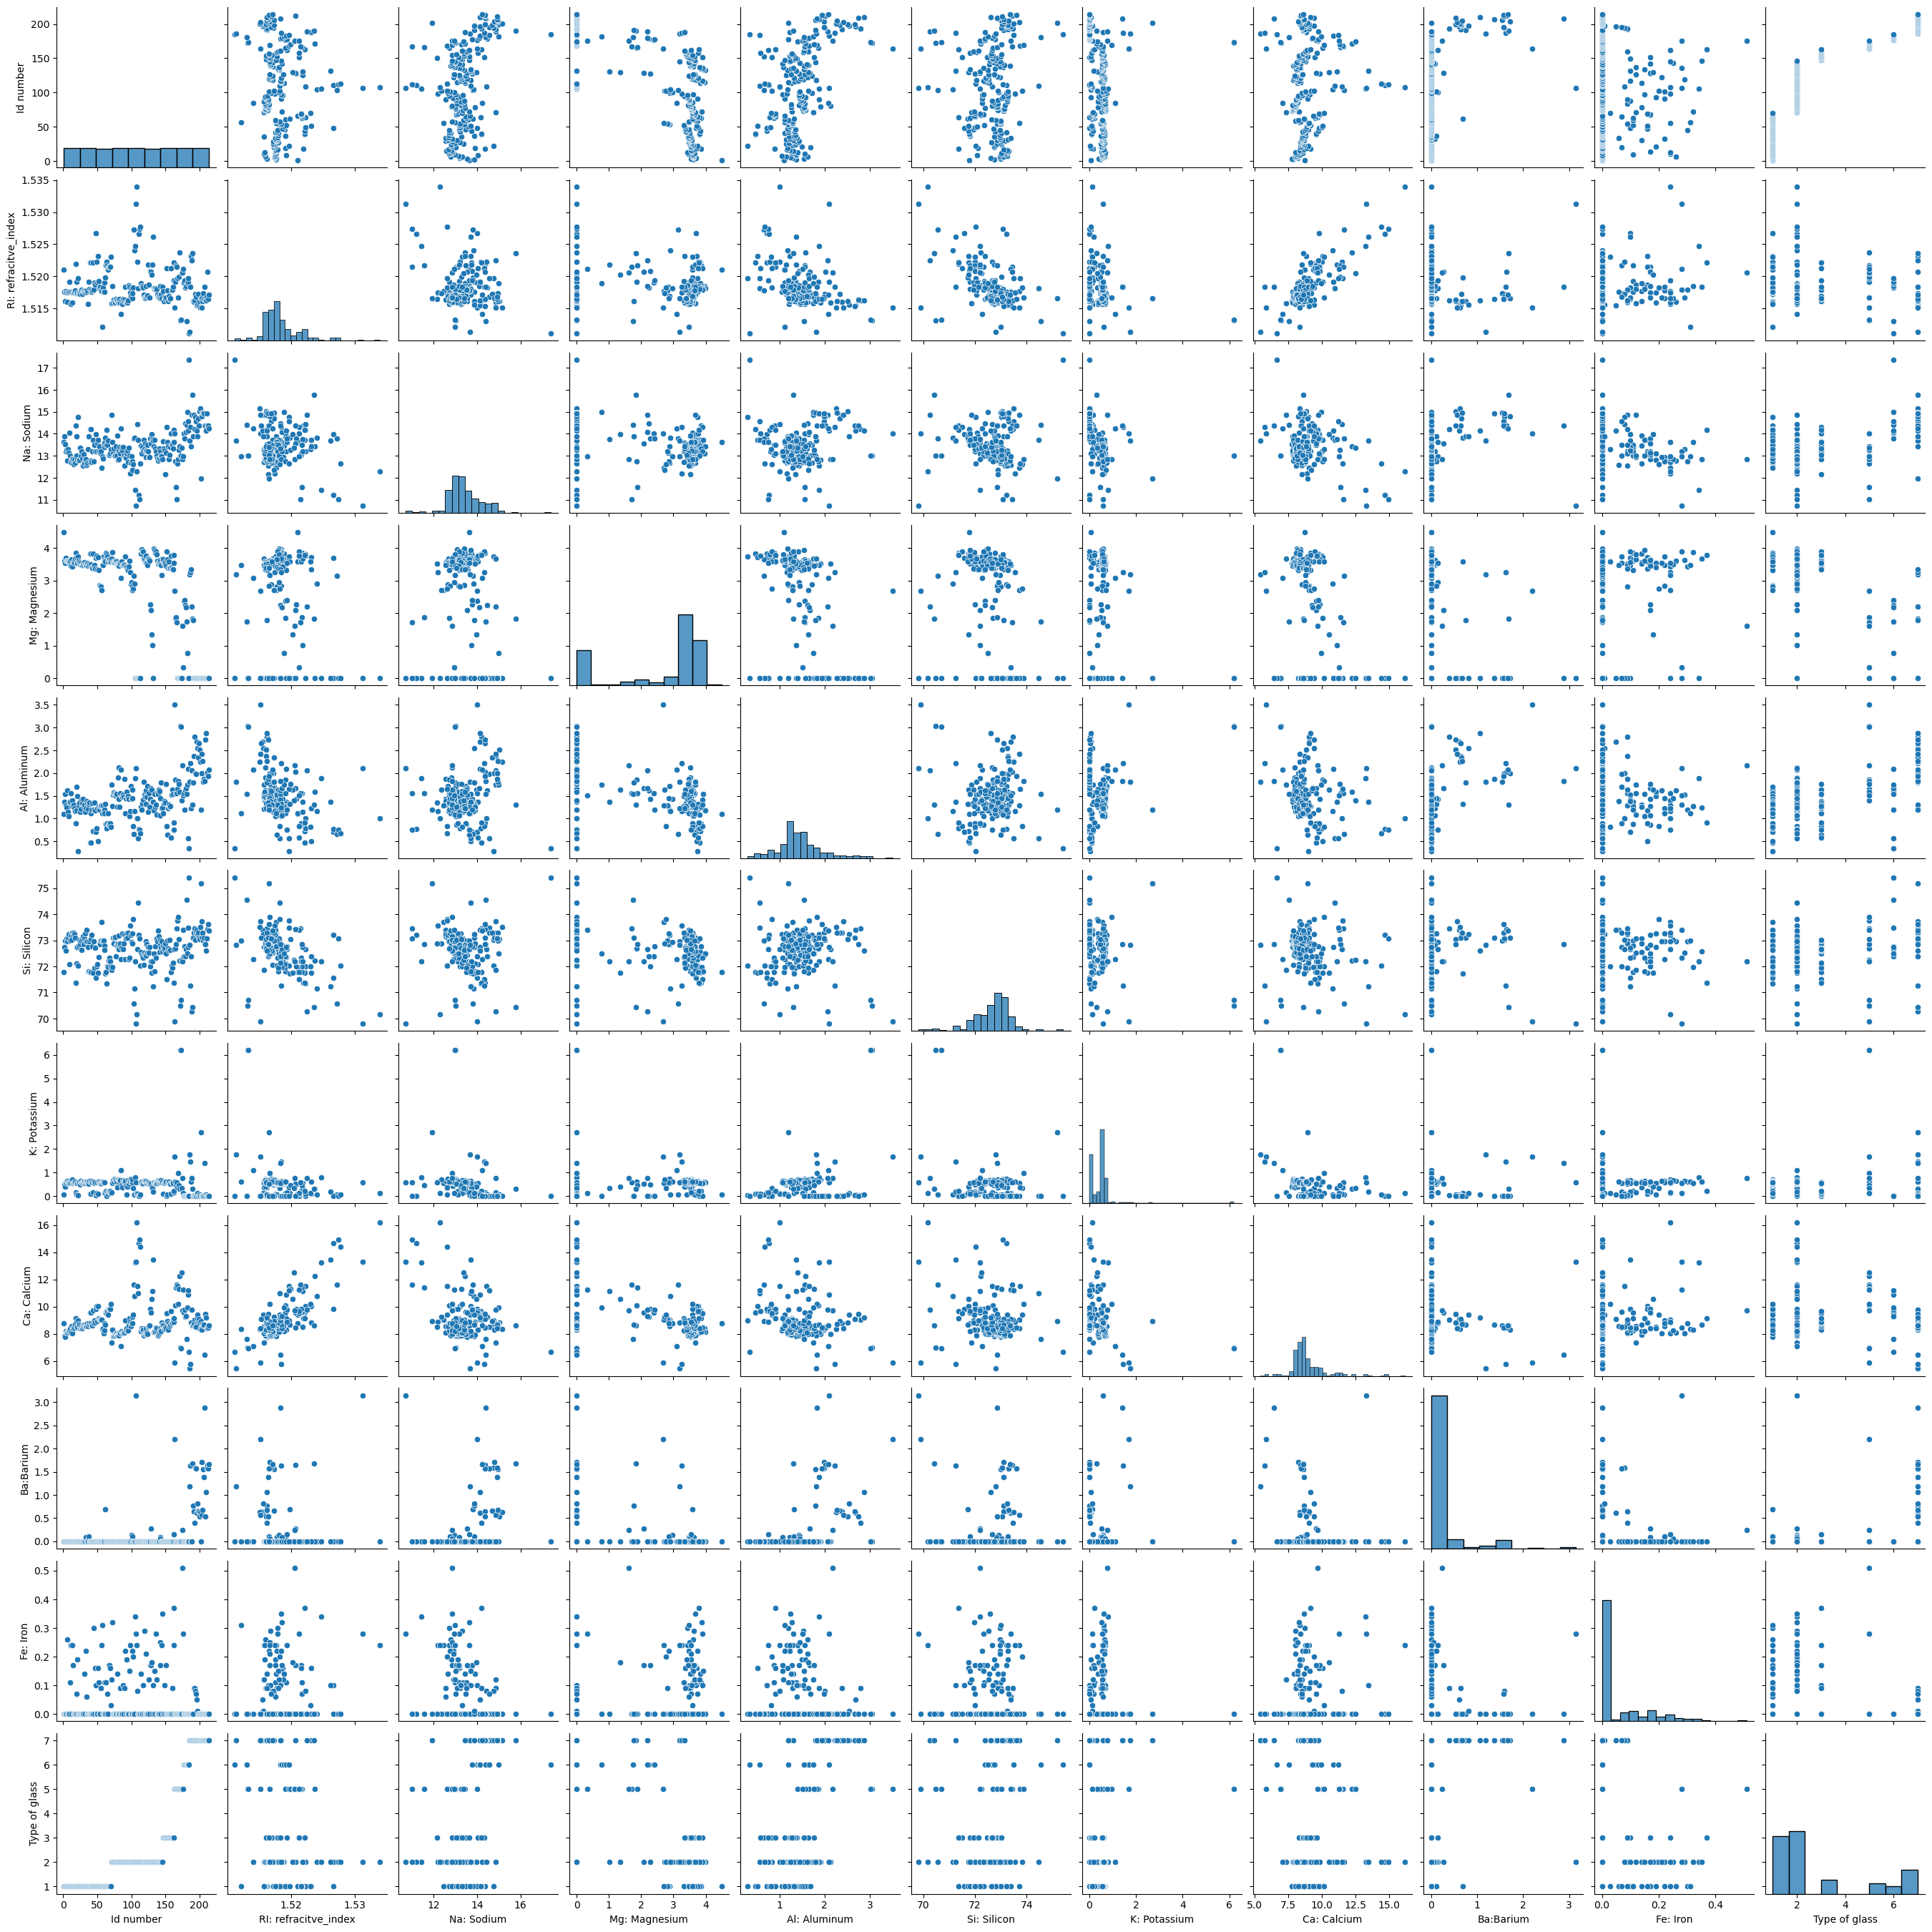

In [37]:
sns.pairplot(df1)

After looking at the correlation and the graph, types of glass depend on the amount of Aluminum, Barium and Sodiam, and this is same in our case. 

<AxesSubplot:>

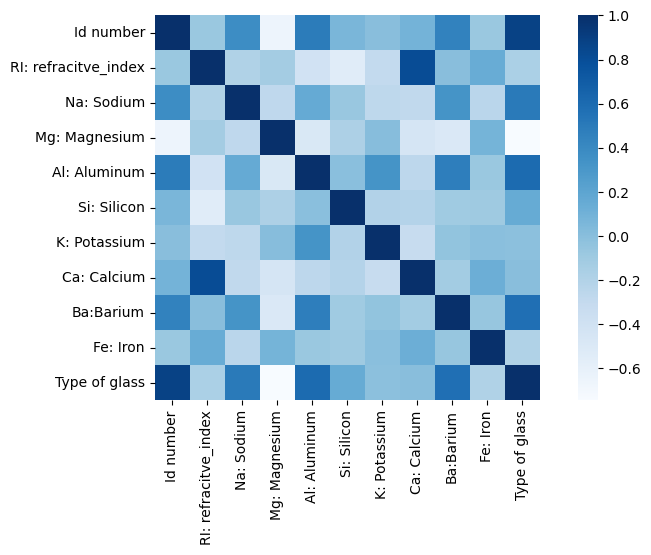

In [38]:
#Correlation Map

cor = df1.corr(method ="pearson")
f, ax=plt.subplots(figsize = (10,5))
sns.heatmap(cor,mask=np.zeros_like(cor,dtype=np.bool),
           cmap="Blues",square=True, ax= ax)

In [39]:
df1.shape

(214, 12)

# ## Checking for Outlier

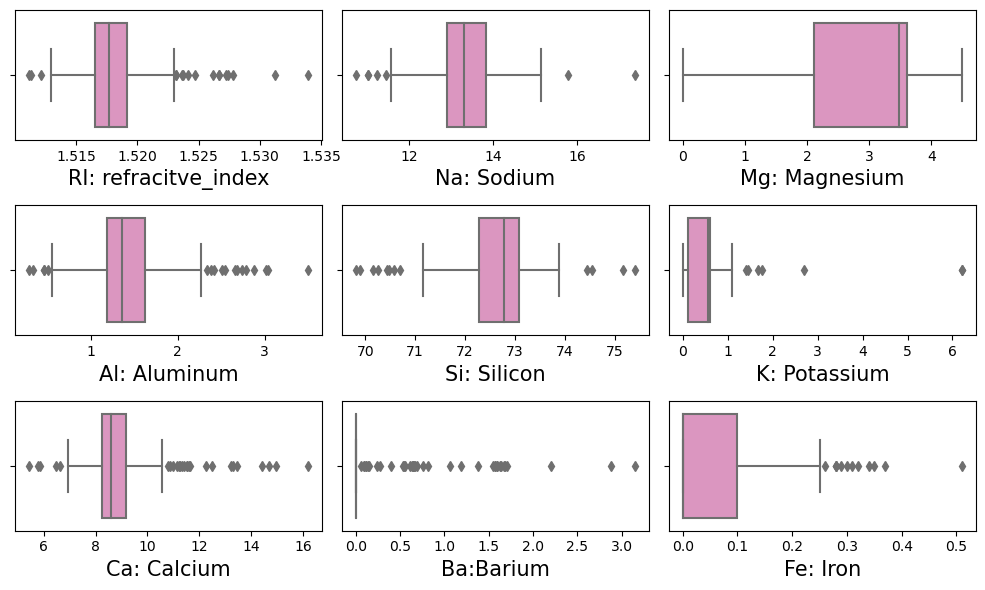

In [51]:
#lets check the outliers by plotting boxplot of categorical column

plt.figure(figsize = (10,6), facecolor ="white")
plotnumber = 1 
for col in numerical_col:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.boxplot(df1[col],palette = "Set2_r")
        plt.xlabel(col, fontsize = 15)
        plt.yticks(rotation = 0, fontsize = 10)
    plotnumber+=1
plt.tight_layout()


In [52]:

from scipy.stats import zscore

out_features=df1[['Na: Sodium','Al: Aluminum','Ca: Calcium','Ba:Barium','K: Potassium','Si: Silicon','Fe: Iron']]
z=np.abs(zscore(out_features))
z

,Na: Sodium,Al: Aluminum,Ca: Calcium,Ba:Barium,K: Potassium,Si: Silicon,Fe: Iron
0,0.284953,0.692442,0.145766,0.352877,0.671705,1.127082,0.576228
1,0.591817,0.170460,0.793734,0.352877,0.026213,0.102319,0.586515
2,0.149933,0.190912,0.828949,0.352877,0.164533,0.438787,0.586515
3,0.242853,0.310994,0.519052,0.352877,0.112107,0.052974,0.586515
4,0.169205,0.411375,0.624699,0.352877,0.081369,0.555256,0.586515
...,...,...,...,...,...,...,...
209,0.898681,2.881125,0.157088,1.783978,0.640968,0.052974,0.586515
210,1.856097,1.094342,0.392276,2.852405,0.763919,0.529374,0.586515
211,1.168721,1.154570,0.364103,2.953200,0.763919,0.995252,0.586515
212,1.193270,0.993960,0.335931,2.812087,0.763919,1.241133,0.586515


In [53]:
#threshold =3
np.where(z>3)

(array([105, 106, 106, 106, 106, 107, 107, 110, 111, 112, 131, 145, 162,
        163, 163, 163, 171, 171, 172, 172, 174, 184, 184, 188, 189, 201,
        201, 203, 207, 213], dtype=int64),
 array([2, 0, 2, 3, 5, 2, 5, 2, 2, 2, 2, 6, 6, 1, 3, 5, 1, 4, 1, 4, 6, 0,
        5, 5, 3, 4, 5, 3, 3, 3], dtype=int64))

In [54]:
df2=df1[(z<3).all(axis=1)]
df2.shape

(194, 12)

In [55]:
#shape of old and new dataframe

print("old data frame",df1.shape[0])
print("new data frame",df2.shape[0])

old data frame 214
new data frame 194


In [56]:
print("Data loss percentage",((df1.shape[0]-df2.shape[0])/df1.shape[0])*100)

Data loss percentage 9.345794392523365


In [57]:
df2.shape

(194, 12)

In [73]:
df2

,Id number,RI: refracitve_index,Na: Sodium,Mg: Magnesium,Al: Aluminum,Si: Silicon,K: Potassium,Ca: Calcium,Ba:Barium,Fe: Iron,Type of glass,Window glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.001,1,Window glass
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.000,1,Window glass
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.000,1,Window glass
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.000,1,Window glass
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.000,1,Window glass
...,...,...,...,...,...,...,...,...,...,...,...,...
208,209,1.51640,14.37,0.00,2.74,72.85,0.00,9.45,0.54,0.000,7,Non-window glass
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.000,7,Non-window glass
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.000,7,Non-window glass
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.000,7,Non-window glass


In [ ]:
df2=df2.drop('Id number',axis=True)

In [79]:
df2

,RI: refracitve_index,Na: Sodium,Mg: Magnesium,Al: Aluminum,Si: Silicon,K: Potassium,Ca: Calcium,Ba:Barium,Fe: Iron,Type of glass,Window glass
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.001,1,Window glass
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.000,1,Window glass
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.000,1,Window glass
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.000,1,Window glass
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.000,1,Window glass
...,...,...,...,...,...,...,...,...,...,...,...
208,1.51640,14.37,0.00,2.74,72.85,0.00,9.45,0.54,0.000,7,Non-window glass
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.000,7,Non-window glass
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.000,7,Non-window glass
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.000,7,Non-window glass


In [82]:
#Encoding categorical columns using Ordinal Encoder

from sklearn.preprocessing import OrdinalEncoder

OE = OrdinalEncoder()
for i in df2.columns:
    if df2[i].dtypes != 'float':
        df2[i]= OE.fit_transform(df2[i].values.reshape(-1,1))
df2

,RI: refracitve_index,Na: Sodium,Mg: Magnesium,Al: Aluminum,Si: Silicon,K: Potassium,Ca: Calcium,Ba:Barium,Fe: Iron,Type of glass,Window glass
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.001,0.0,1.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.000,0.0,1.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.000,0.0,1.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.000,0.0,1.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.000,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
208,1.51640,14.37,0.00,2.74,72.85,0.00,9.45,0.54,0.000,5.0,0.0
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.000,5.0,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.000,5.0,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.000,5.0,0.0


# #Checking how the data has been distributed in each column

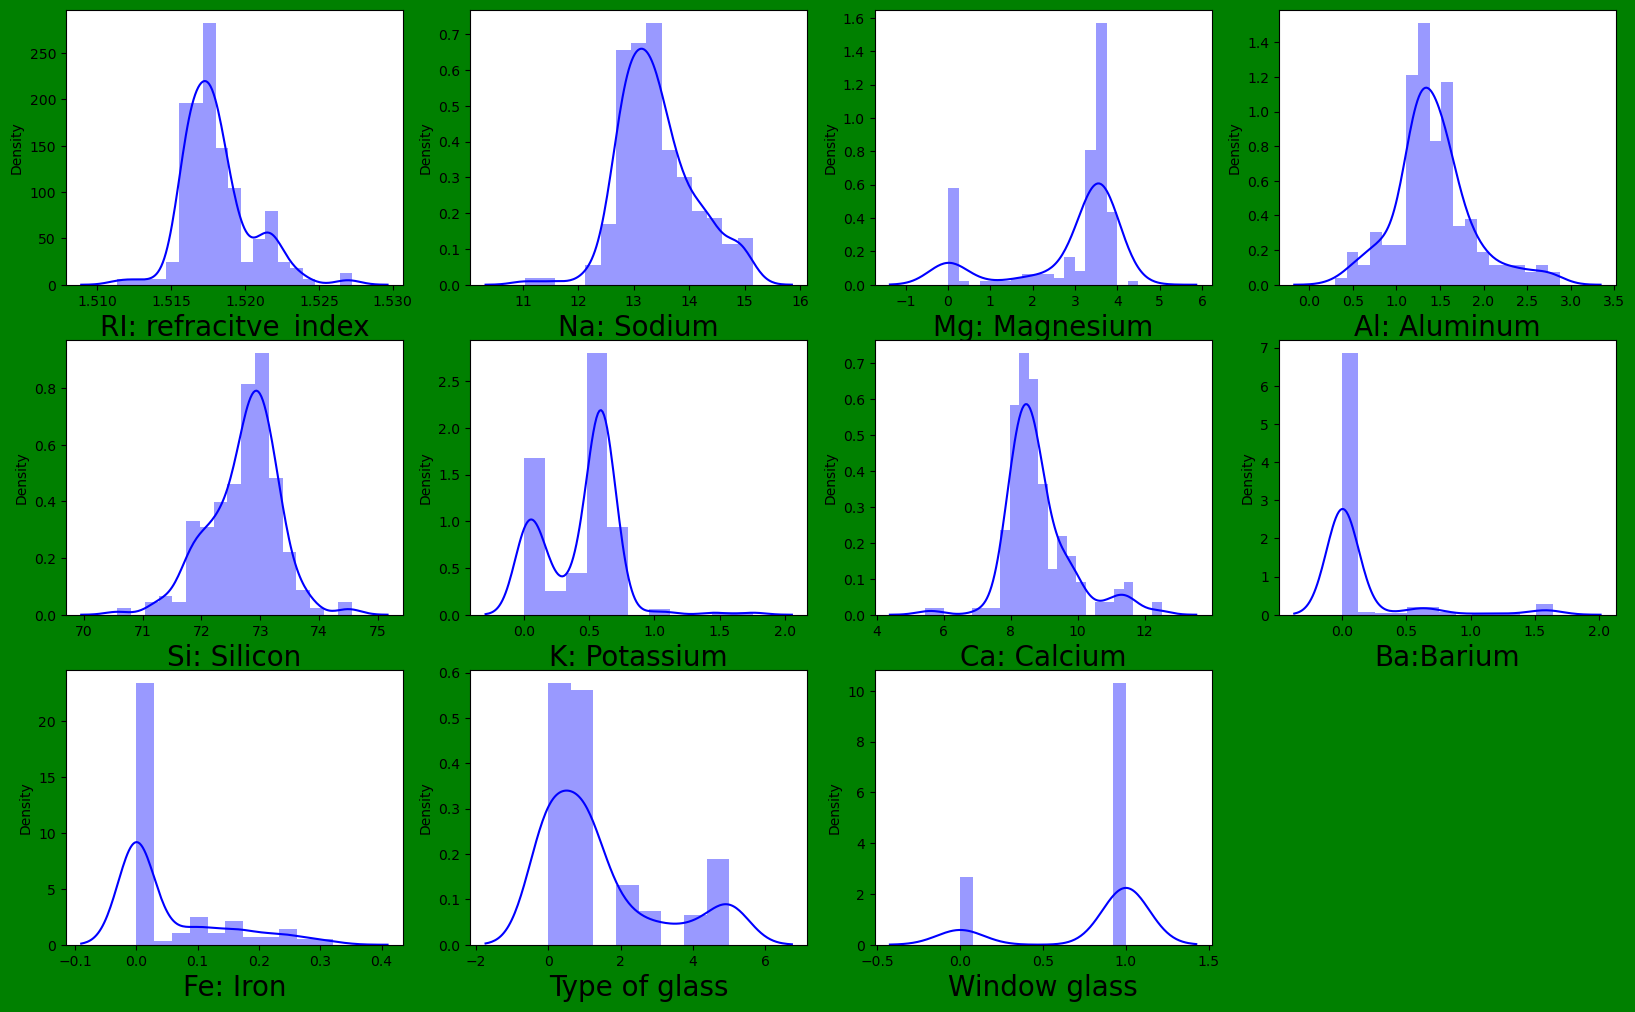

In [83]:
plt.figure(figsize=(20,25),facecolor="green")
plotnumber = 1

for column in df2:
    if plotnumber <= 18:
        ax = plt.subplot(6,4,plotnumber)
        sns.distplot(df2[column],color='b')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()    
        

In [84]:
df2.skew()

RI: refracitve_index    0.952733
Na: Sodium              0.371482
Mg: Magnesium          -1.528849
Al: Aluminum            0.658259
Si: Silicon            -0.425450
K: Potassium            0.303175
Ca: Calcium             1.077962
Ba:Barium               3.188587
Fe: Iron                1.486522
Type of glass           1.197456
Window glass           -1.463837
dtype: float64

if skewness is (-0.5 to +0.5 ), here skewness of Type of glass column is 1.197 so the weight in the left tail of the distribution. The skewness of Window glass is -1.46, which indicate that skewness is on the right side. 

Skewness is a statistical term and it is a way to estimate or measure the shape of a distribution. Skewness can be two types:

Skewness = 0: Then normally distributed.
Skewness > 0: Then more weight in the left tail of the distribution.
Skewness < 0: Then more weight in the right tail of the distribution.

In [85]:
#removing skewness using cuberoot method

df2['Type of glass']=np.cbrt(df2['Type of glass'])


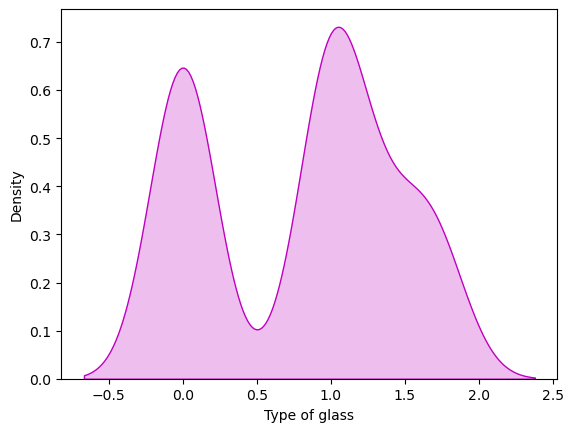

In [87]:
#Let visualize how the data distributed in happiness score after removing skewness

sns.distplot(df2['Type of glass'],color = "m",kde_kws = {"shade":True},hist = False)
plt.show()

In [88]:
#removing skewness using cuberoot method

df2['Ba:Barium']=np.cbrt(df2['Ba:Barium'])


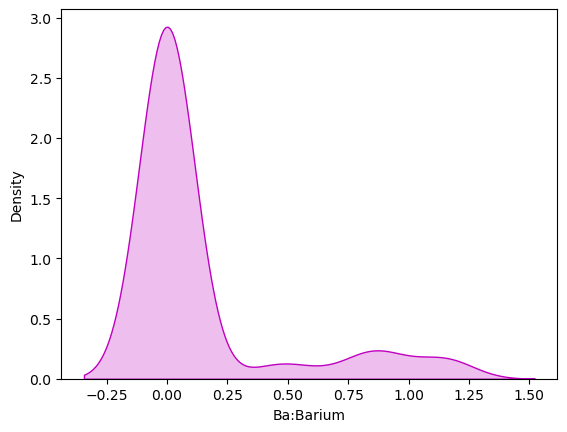

In [90]:
#Let visualize how the data distributed in happiness score after removing skewness

sns.distplot(df2['Ba:Barium'],color = "m",kde_kws = {"shade":True},hist = False)
plt.show()

In [92]:
#removing skewness using cuberoot method

df2['Fe: Iron']=np.cbrt(df2['Fe: Iron'])


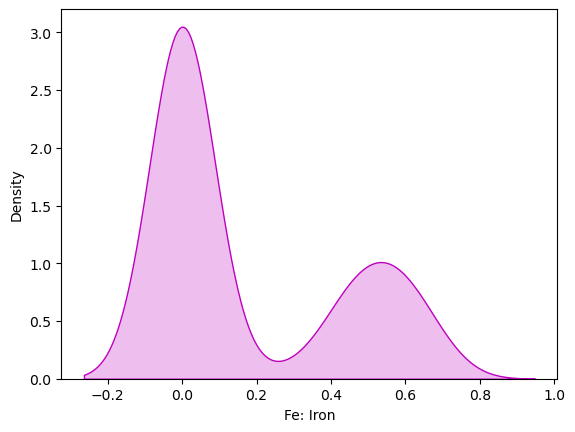

In [93]:
#Let visualize how the data distributed in happiness score after removing skewness

sns.distplot(df2['Fe: Iron'],color = "m",kde_kws = {"shade":True},hist = False)
plt.show()

In [94]:
#removing skewness using cuberoot method

df2['Window glass']=np.cbrt(df2['Window glass'])


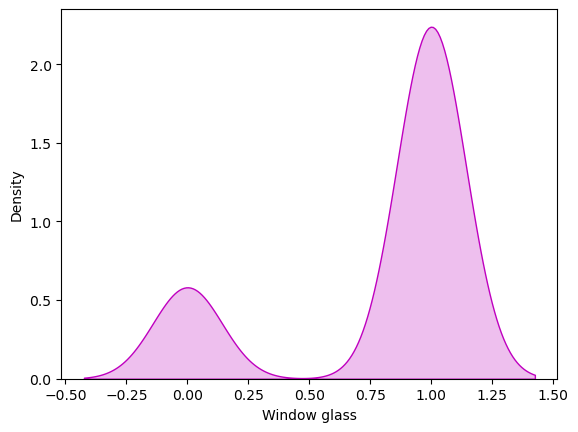

In [95]:
#Let visualize how the data distributed in happiness score after removing skewness

sns.distplot(df2['Window glass'],color = "m",kde_kws = {"shade":True},hist = False)
plt.show()

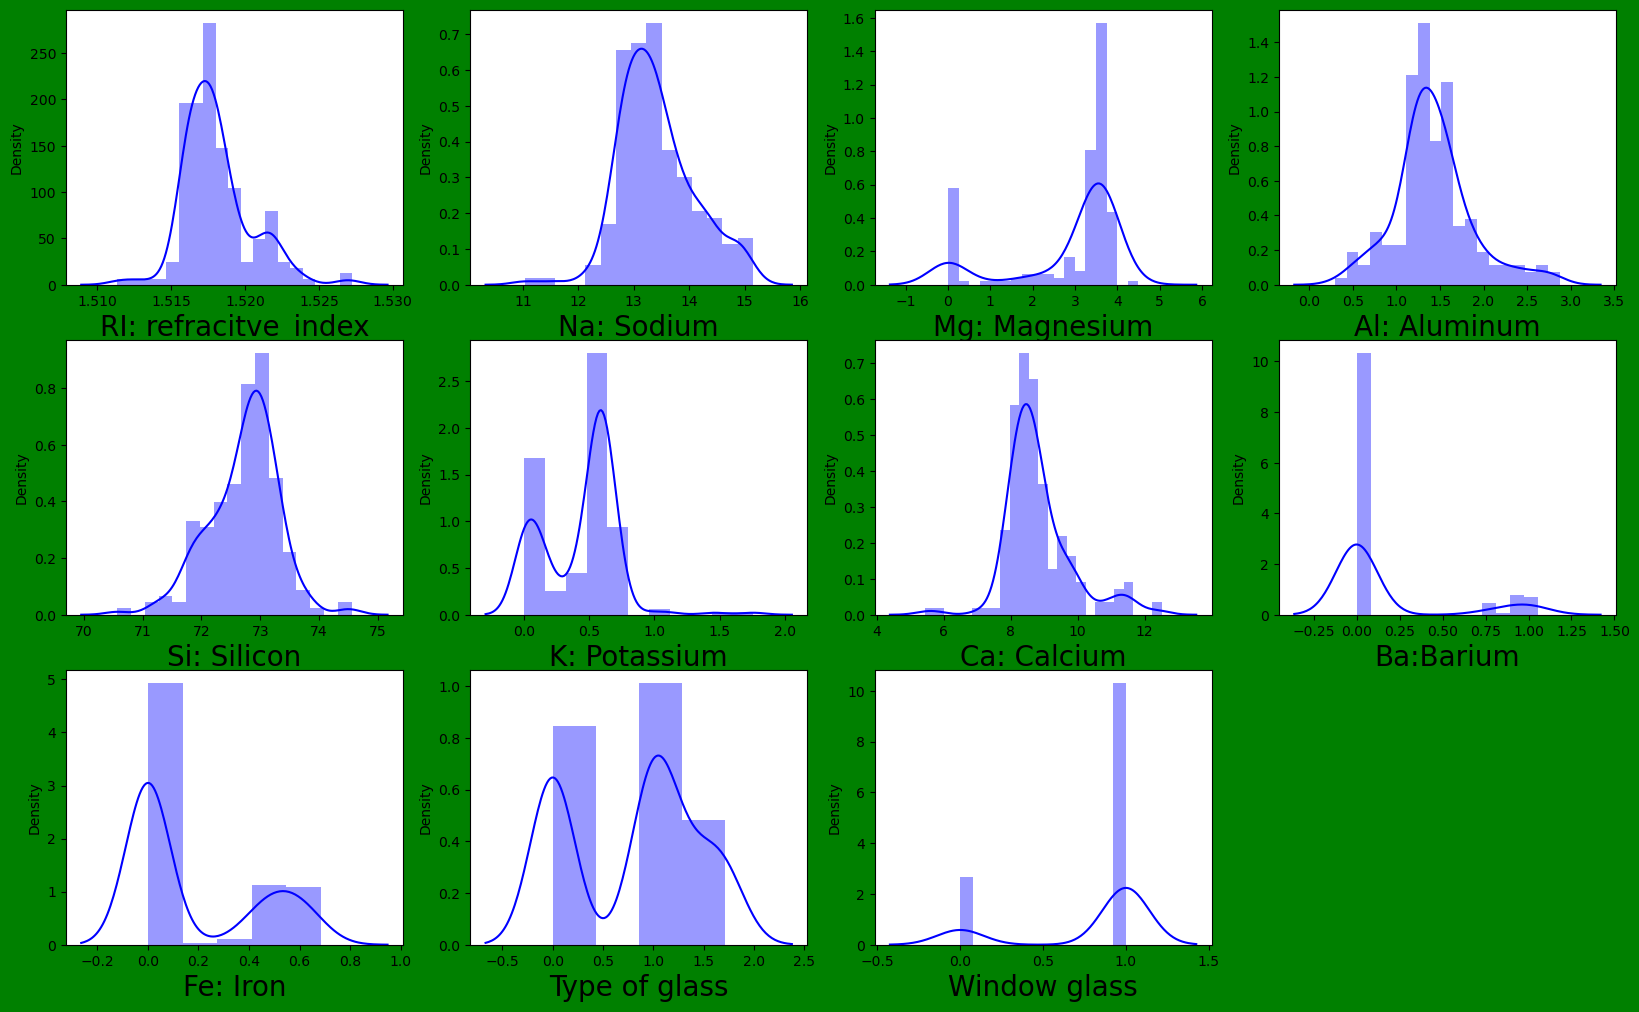

In [96]:
#Rechecking the skewness level in the dataframe df2

plt.figure(figsize=(20,25),facecolor="green")
plotnumber = 1

for column in df2:
    if plotnumber <= 18:
        ax = plt.subplot(6,4,plotnumber)
        sns.distplot(df2[column],color='b')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()    
        

In [97]:
df2.skew()

RI: refracitve_index    0.952733
Na: Sodium              0.371482
Mg: Magnesium          -1.528849
Al: Aluminum            0.658259
Si: Silicon            -0.425450
K: Potassium            0.303175
Ca: Calcium             1.077962
Ba:Barium               1.923662
Fe: Iron                0.881096
Type of glass          -0.154067
Window glass           -1.463837
dtype: float64

## Correlation between target variable and independent variables

In [98]:
#Now we will check the correlation target variable and independent variable
df2.corr()

,RI: refracitve_index,Na: Sodium,Mg: Magnesium,Al: Aluminum,Si: Silicon,K: Potassium,Ca: Calcium,Ba:Barium,Fe: Iron,Type of glass,Window glass
RI: refracitve_index,1.000000,0.050760,0.048147,-0.522197,-0.609011,-0.368238,0.690650,-0.222709,0.018874,-0.216613,0.060410
Na: Sodium,0.050760,1.000000,-0.487729,0.253127,-0.234718,-0.612183,0.019987,0.512768,-0.160357,0.367036,-0.463723
Mg: Magnesium,0.048147,-0.487729,1.000000,-0.593457,-0.377464,0.482622,-0.455582,-0.591252,0.106641,-0.612461,0.840407
Al: Aluminum,-0.522197,0.253127,-0.593457,1.000000,0.335262,0.005827,-0.213304,0.580688,-0.085557,0.576518,-0.600752
Si: Silicon,-0.609011,-0.234718,-0.377464,0.335262,1.000000,0.072579,-0.165712,0.183753,-0.000854,0.197623,-0.282746
K: Potassium,-0.368238,-0.612183,0.482622,0.005827,0.072579,1.000000,-0.500579,-0.283827,0.049657,-0.203223,0.396495
Ca: Calcium,0.690650,0.019987,-0.455582,-0.213304,-0.165712,-0.500579,1.000000,-0.124994,0.003696,0.086561,-0.288044
Ba:Barium,-0.222709,0.512768,-0.591252,0.580688,0.183753,-0.283827,-0.124994,1.000000,0.005740,0.451845,-0.582306
Fe: Iron,0.018874,-0.160357,0.106641,-0.085557,-0.000854,0.049657,0.003696,0.005740,1.000000,-0.122588,0.196289
Type of glass,-0.216613,0.367036,-0.612461,0.576518,0.197623,-0.203223,0.086561,0.451845,-0.122588,1.000000,-0.669124


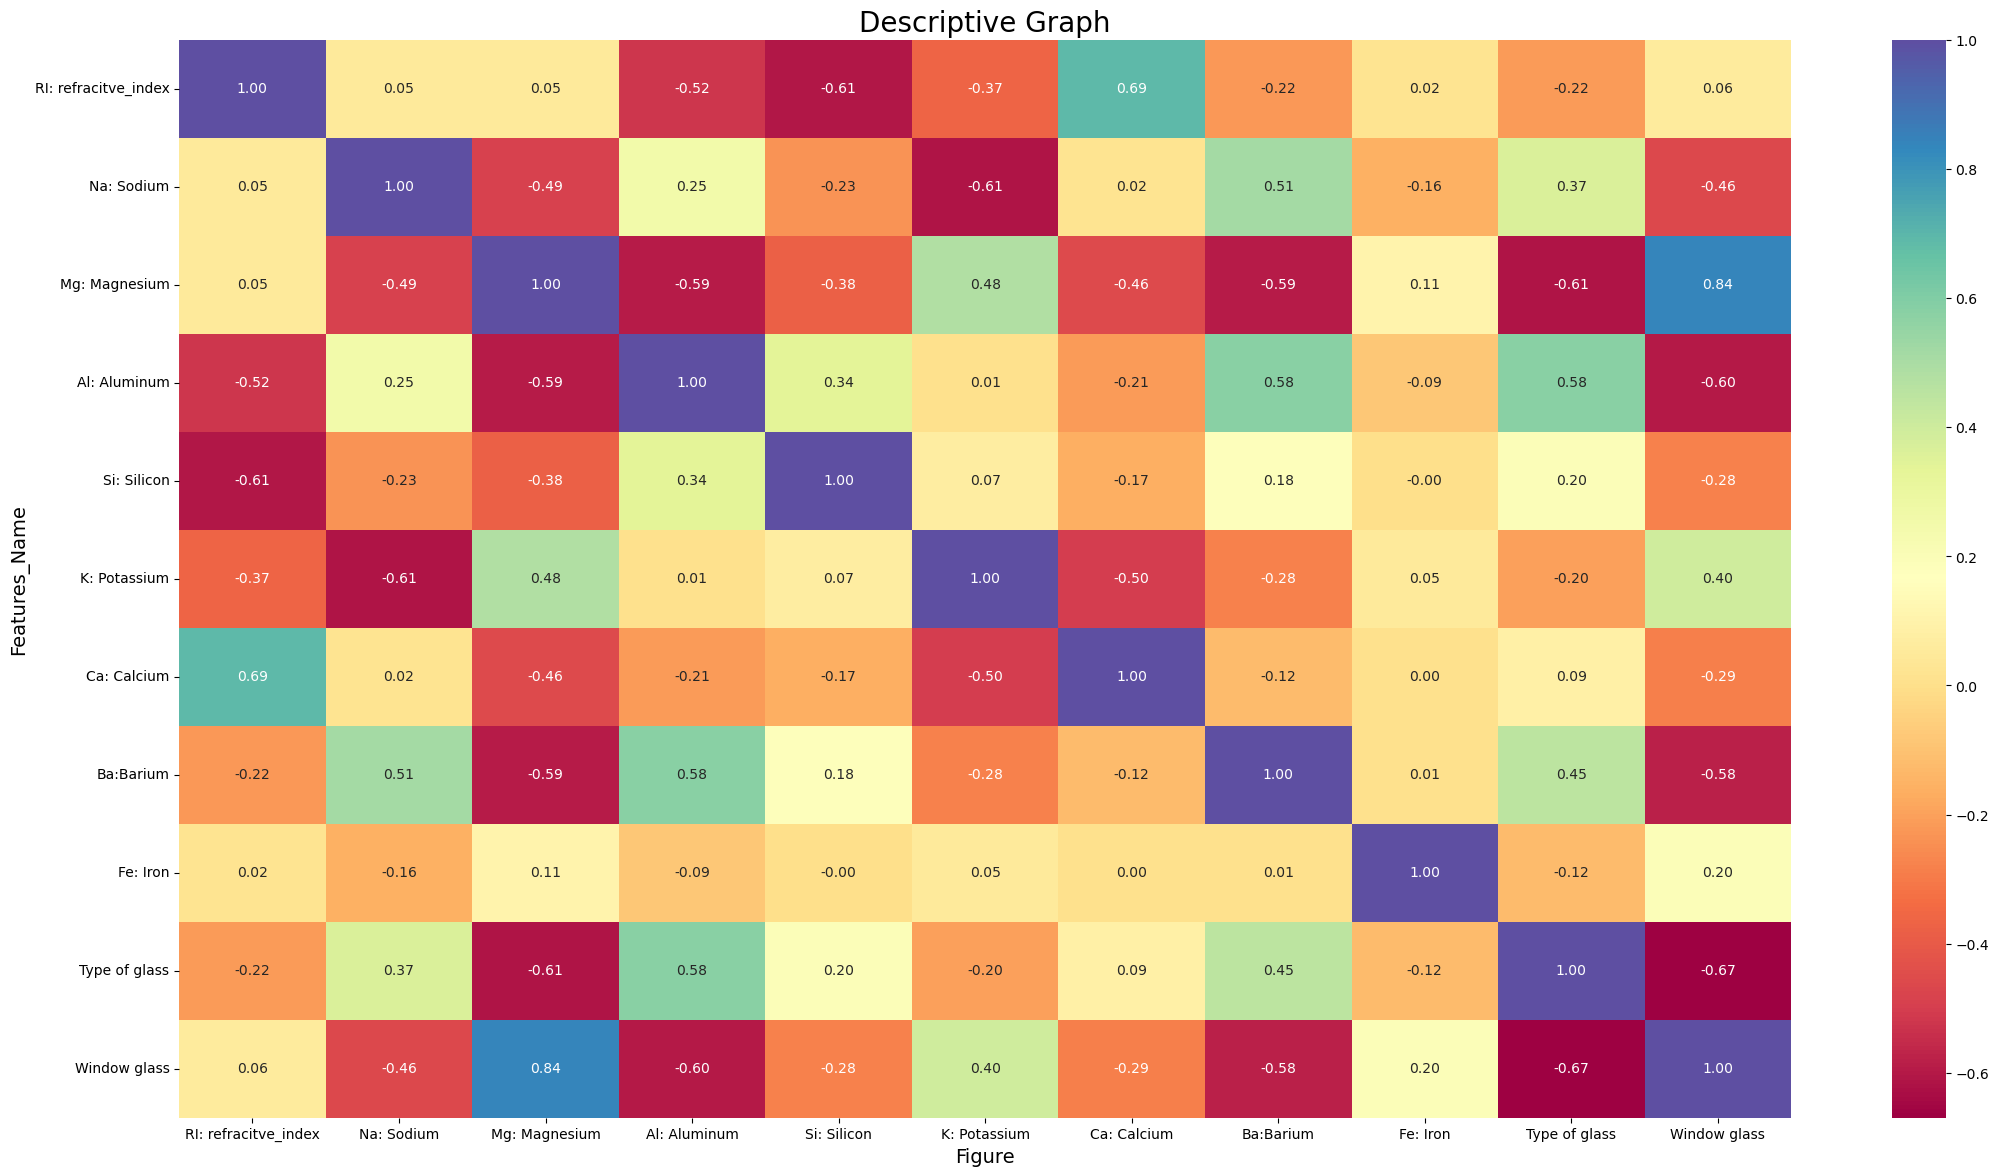

In [99]:
plt.figure(figsize=(26,14))
sns.heatmap(df2.corr(),annot =True, fmt ='0.2f',linecolor='black',cmap='Spectral')
plt.xlabel('Figure',fontsize=14)
plt.ylabel('Features_Name',fontsize=14)
plt.title('Descriptive Graph',fontsize=20)
plt.show()

In [101]:
df2.corr()['Type of glass'].sort_values()

Window glass           -0.669124
Mg: Magnesium          -0.612461
RI: refracitve_index   -0.216613
K: Potassium           -0.203223
Fe: Iron               -0.122588
Ca: Calcium             0.086561
Si: Silicon             0.197623
Na: Sodium              0.367036
Ba:Barium               0.451845
Al: Aluminum            0.576518
Type of glass           1.000000
Name: Type of glass, dtype: float64

In [102]:
df2.describe

<bound method NDFrame.describe of      RI: refracitve_index  Na: Sodium  Mg: Magnesium  Al: Aluminum  \
0                 1.52101       13.64           4.49          1.10   
1                 1.51761       13.89           3.60          1.36   
2                 1.51618       13.53           3.55          1.54   
3                 1.51766       13.21           3.69          1.29   
4                 1.51742       13.27           3.62          1.24   
..                    ...         ...            ...           ...   
208               1.51640       14.37           0.00          2.74   
209               1.51623       14.14           0.00          2.88   
210               1.51685       14.92           0.00          1.99   
211               1.52065       14.36           0.00          2.02   
212               1.51651       14.38           0.00          1.94   

     Si: Silicon  K: Potassium  Ca: Calcium  Ba:Barium  Fe: Iron  \
0          71.78          0.06         8.75   0.000000   

## Visualizing the correlation between label and features using bar plot 

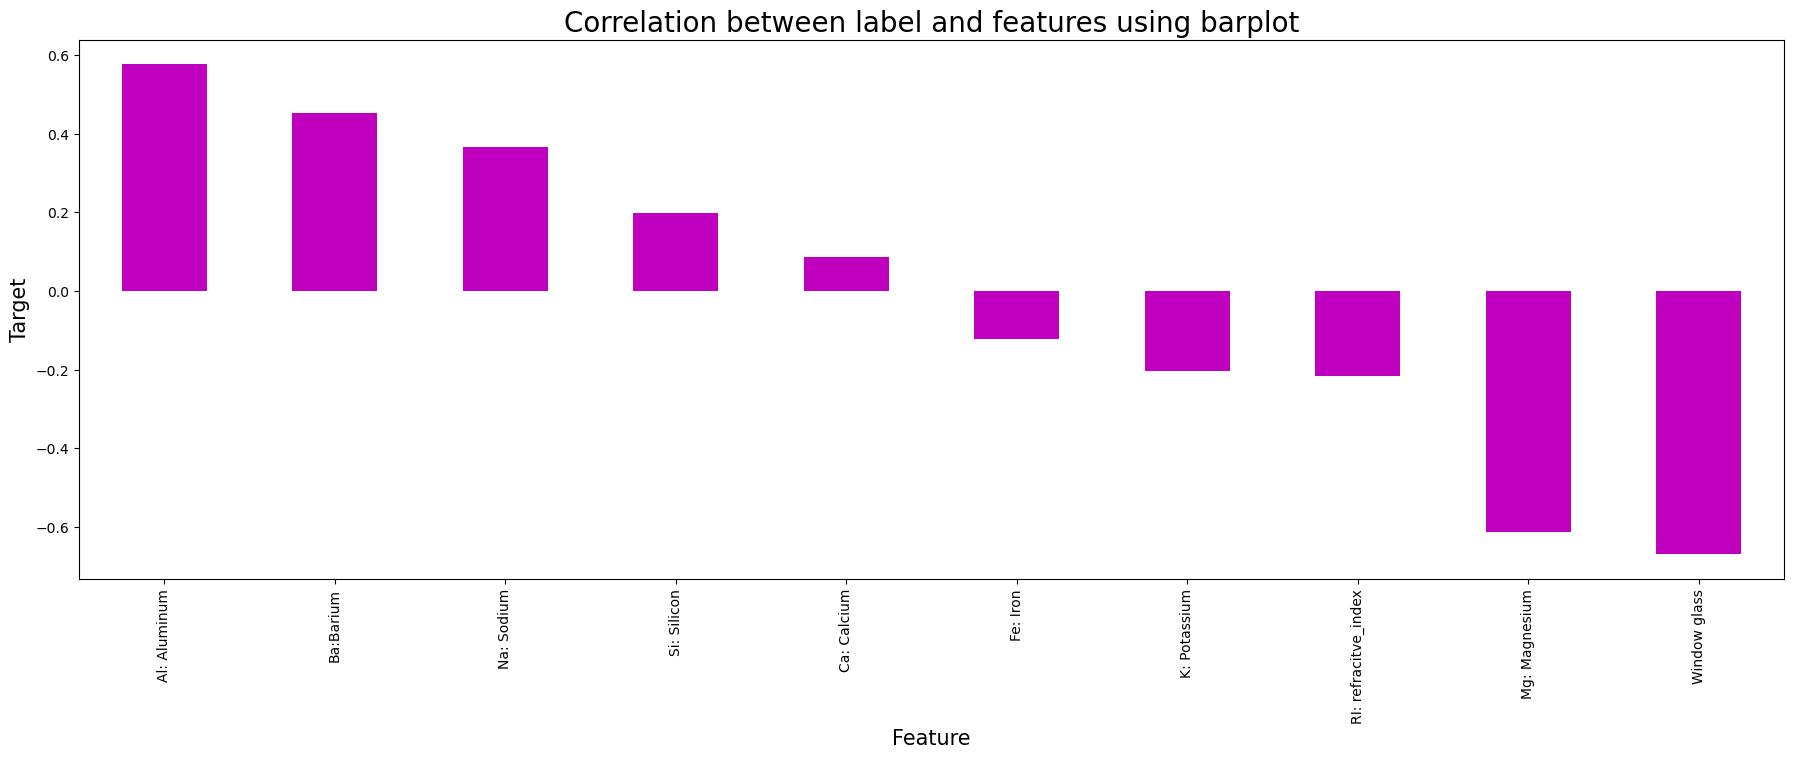

In [103]:
plt.figure(figsize = (22,7))
df2.corr()['Type of glass'].sort_values(ascending=False).drop(['Type of glass']).plot(kind='bar',color ="m")
plt.xlabel('Feature',fontsize=15)
plt.ylabel('Target',fontsize=15)
plt.title("Correlation between label and features using barplot",fontsize=20)
plt.show()


## Seperating features and label

In [104]:
#Seperating the independent and target variables into x and y
x = df2.drop(["Ca: Calcium","Fe: Iron","K: Potassium"],axis=1)
y = df2['Type of glass'].astype(int)

print("Feature Dimension",x.shape)
print("Label Dimension",y.shape)

Feature Dimension (194, 8)
Label Dimension (194,)


## Feature Scaling using Standard Scalarization

In [105]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x),columns =x.columns)
x

,RI: refracitve_index,Na: Sodium,Mg: Magnesium,Al: Aluminum,Si: Silicon,Ba:Barium,Type of glass,Window glass
0,1.291781,0.332127,1.233397,-0.729105,-1.612464,-0.433182,-1.240374,0.509647
1,-0.197832,0.704398,0.551581,-0.141722,0.016082,-0.433182,-1.240374,0.509647
2,-0.824346,0.168328,0.513277,0.264928,0.461790,-0.433182,-1.240374,0.509647
3,-0.175926,-0.308179,0.620529,-0.299864,-0.189629,-0.433182,-1.240374,0.509647
4,-0.281075,-0.218834,0.566903,-0.412822,0.616073,-0.433182,-1.240374,0.509647
...,...,...,...,...,...,...,...,...
189,-0.727959,1.419158,-2.206325,2.975928,0.221793,2.267065,1.446067,-1.962142
190,-0.802440,1.076668,-2.206325,3.292211,-0.189629,2.477195,1.446067,-1.962142
191,-0.530805,2.238153,-2.206325,1.281553,0.581788,2.611311,1.446067,-1.962142
192,1.134057,1.404267,-2.206325,1.349328,1.198921,2.621803,1.446067,-1.962142


In [106]:
y.value_counts()

y

0      0
1      0
2      0
3      0
4      0
      ..
208    1
209    1
210    1
211    1
212    1
Name: Type of glass, Length: 194, dtype: int32

## Checking Variance Inflation Factor(VIF)


In [274]:
#Finding variance inflaction factor in each scaled column i.e, x.shape[1] (1/(1-R2))

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF values"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif["Features"]=x.columns
vif

,VIF values,Features
0,4.979728,RI: refracitve_index
1,2.731284,Na: Sodium
2,6.864409,Mg: Magnesium
3,4.283049,Al: Aluminum
4,4.860176,Si: Silicon
5,2.094145,Ba:Barium
6,2.218391,Type of glass
7,4.428011,Window glass


In [312]:
#Again checking VIF value to confirm whether the multicollinearity still exists

vif = pd.DataFrame()
vif['VIF values']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif["Freatures"]=x.columns
vif.round(2)


,VIF values,Freatures
0,4.98,RI: refracitve_index
1,2.73,Na: Sodium
2,6.86,Mg: Magnesium
3,4.28,Al: Aluminum
4,4.86,Si: Silicon
5,2.09,Ba:Barium
6,2.22,Type of glass
7,4.43,Window glass


# Oversampling


In [313]:
#oversampling the data

from imblearn.over_sampling import SMOTE
SM = SMOTE()
X,y = SM.fit_resample(x,y)


In [314]:
y.value_counts()

0    124
1    124
Name: Type of glass, dtype: int64

## Creating train test split

In [339]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score


In [340]:
#finding the best Random state, we are using logistic regression 

maxAcc = 0
maxRS = 0
for i in range(1,200):
    x_train, x_test, y_train,y_test = train_test_split(X,y,test_size = 0.25, random_state = i)
    lr=LogisticRegression(penalty='l1', solver='liblinear')
    lr.fit(x_train, y_train)
    pred = lr.predict(x_test)
    acc = r2_score(y_test,pred)
    if acc > maxAcc:
        maxAcc = acc
        maxRS = i

print("Max r2 score accuracy is ",maxAcc, "at random_state",maxRS)

Max r2 score accuracy is  1.0 at random_state 1


# Modeling

In [341]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.experimental import enable_hist_gradient_boosting


# Random Forest Classifier

In [342]:
#Checking accuracy for RandomForestClassifier

RFC = RandomForestClassifier()
RFC.fit(x_train,y_train)
predRFC=RFC.predict(x_test)
print(r2_score(y_test,predRFC))
print(confusion_matrix(y_test,predRFC))
print(classification_report(y_test,predRFC))


1.0
[[37  0]
 [ 0 25]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       1.00      1.00      1.00        25

    accuracy                           1.00        62
   macro avg       1.00      1.00      1.00        62
weighted avg       1.00      1.00      1.00        62



# Logistic Regression

In [343]:
LR= LogisticRegression()
LR.fit(x_train, y_train)
predLR = LR.predict(x_test)
print(r2_score(y_test,predLR))
print(confusion_matrix(y_test,predLR))
print(classification_report(y_test,predLR))

1.0
[[37  0]
 [ 0 25]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       1.00      1.00      1.00        25

    accuracy                           1.00        62
   macro avg       1.00      1.00      1.00        62
weighted avg       1.00      1.00      1.00        62



# Support Vector Machine Classifier


In [344]:
#Checking accuracy for support vector machine classifier

svc = SVC()
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
print(r2_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

1.0
[[37  0]
 [ 0 25]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       1.00      1.00      1.00        25

    accuracy                           1.00        62
   macro avg       1.00      1.00      1.00        62
weighted avg       1.00      1.00      1.00        62



# Cross Validation Score

Cross-validation is a resampling method that uses different portions of the data to test and train a model on different iterations. It is mainly used in settings where the goal is prediction, and one wants to estimate how accurately a predictive model will perform in practice. 

In [345]:
from sklearn.model_selection import cross_val_score


cv=5--- it's a fold value  1, 2, 3, 4, 5
cross_val_score(modelname, features, targetvariable, cv=foldvalue, scoring='accuracy')


in classification algorithms- default scoring parameter- accuracy
for regression- deafulat scoring parameter is - r2 score


In [323]:
#Checking cv score for Random Forest Classifier

score = cross_val_score(RFC,X,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is -", r2_score(y_test,predRFC)-score.mean())



[1. 1. 1. 1. 1.]
1.0
Difference between Accuracy score and cross validation score is - 0.0


In [346]:
#Checking cv score for Logistic Regression

lr = LogisticRegression()
score = cross_val_score(lr, X, y, cv=5)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is -", r2_score(y_test,predLR)-score.mean())


[1. 1. 1. 1. 1.]
1.0
Difference between Accuracy score and cross validation score is - 0.0


In [286]:
#Checking cv score for Support Vector Machine Classifier

score = cross_val_score(svc,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is -", r2_score(y_test,predsvc)-score.mean())


[1. 1. 1. 1. 1.]
1.0
Difference between Accuracy score and cross validation score is - 0.0


Observing the classifiers in our model, Support Vector Machine Classifier is our best model as the difference between accuracy score and cross validation is least. 

# Hyperparameter Tuning
Hyperparameter tuning is the art of finding the best settings for a machine learning model

Hyperparameters are the knobs that control the learning process, such as learning rate, number of layers, or Different hyperparameters can lead to different levels of accuracy, speed, and complexity for the same model and data

In [352]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

#we choose logistic regression model 

LR = LogisticRegression()
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(LR, param_grid, cv=5)
grid.fit(x_train, y_train)
print(grid.best_params_)

{'C': 1}


In [353]:
# Fitting our GridSearchCV Object
grid.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]})

In [354]:
grid.best_params_

{'C': 1}

In [357]:
#Create a final model using logistic fit

Final_model =LogisticRegression()

Final_model.fit(x_train,y_train)

#predict the target variable using the test data
y_prediction= Final_model.predict(x_test)
y_prediction
acc = r2_score(y_test,pred)
print(acc*100)

100.0


# saving the model


In [358]:
import joblib
joblib.dump(Final_model,"Glass_identification_model.pkl")

['Glass_identification_model.pkl']

# Predicting the saved model


In [359]:
#Lets load the saved model and get the prediction

model = joblib.load("Glass_identification_model.pkl")

#Prediction
y_prediction = model.predict(x_test)
y_prediction


array([1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0])

In [361]:
a= np.array(y_test)
df=pd.DataFrame()
df["Predicted"]=y_prediction
df["Original"]=a
df

,Predicted,Original
0,1,1
1,0,0
2,1,1
3,0,0
4,0,0
...,...,...
57,1,1
58,0,0
59,0,0
60,1,1


Our Logisitic regression model does the best accuracy of 100% hence, this is the best model to evaluate the result of Glass identification.  